In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, \
roc_curve, auc, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [5]:
# write paths here
data_path = "/Users/chang.cara/Desktop/proteomics/proteomics_merged.csv"

data = pd.read_csv(data_path)
data = data.drop(columns=["Unnamed: 0"])

# subset based on proteomics
linear_protein_cols = [x for x in data.columns.to_list() if 'linear_UniProt' in x]
protein_cols = [x for x in data.columns.to_list() if 'UniProt' in x] # includes both NPX and linearized NPX too

linear_protein_cols.insert(0, "mtx_binary") # include the response variables
protein_cols.insert(0, "mtx_binary")

linear_proteins = data[linear_protein_cols]

In [6]:
# subset based on proteomics
linear_protein_cols = [x for x in data.columns.to_list() if 'linear_UniProt' in x]
protein_cols = [x for x in data.columns.to_list() if 'UniProt' in x] # includes both NPX and linearized NPX too

linear_protein_cols.insert(0, "mtx_binary") # include the response variables
protein_cols.insert(0, "mtx_binary")

linear_proteins = data[linear_protein_cols]

,mtx_binary,linear_UniProtA0FGR8#ESYT2OID31134,linear_UniProtA1E959#ODAMOID20793,linear_UniProtA1KZ92#PXDNLOID31405,linear_UniProtA1L4H1#SSC5DOID20351,linear_UniProtA4D1B5#GSAPOID21173,linear_UniProtA6BM72#MEGF11OID30099,linear_UniProtA6NC86#PINLYPOID30651,linear_UniProtA6NCE7#MAP1LC3B2OID30074,linear_UniProtA6NDB9#PALM3OID30182,...,linear_UniProtQ9Y6A5#TACC3OID21285,linear_UniProtQ9Y6D9#MAD1L1OID20904,linear_UniProtQ9Y6E0#STK24OID20837,linear_UniProtQ9Y6I3#EPN1OID31252,linear_UniProtQ9Y6K9#IKBKGOID20544,linear_UniProtQ9Y6N7#ROBO1OID20734,linear_UniProtQ9Y6Q6#TNFRSF11AOID20646,linear_UniProtQ9Y6U3#SCINOID30857,linear_UniProtQ9Y6X8#ZHX2OID31140,linear_UniProtQ9Y6Y9#LY96OID20945
0,0,0.388396,0.730725,0.856663,0.751060,0.713458,0.678255,1.123656,0.651348,0.750488,...,0.932645,0.686771,0.838161,1.321888,1.213606,0.577543,0.674131,0.793829,0.649634,0.906388
1,1,0.991030,0.444144,1.207481,1.116126,1.098169,0.874239,1.299179,4.507414,2.139836,...,1.261902,0.856248,1.816297,2.240157,1.115430,1.148937,0.607392,0.454862,0.868381,0.925689
2,0,1.885700,2.930811,1.599809,1.135478,0.795206,0.940761,0.558102,1.357733,1.703616,...,1.179520,1.536236,1.497961,2.296919,1.014170,1.226545,1.439233,0.113771,1.249456,2.177994
3,1,1.423951,0.540325,1.113653,0.617410,0.914782,1.204304,1.358863,3.437834,6.163714,...,1.020093,0.744013,1.671334,1.311393,1.062012,1.092475,0.575465,0.552559,1.062159,0.953299
4,0,1.331359,1.620456,1.261465,0.973060,0.734737,1.629015,0.435547,0.591972,0.664804,...,0.738260,1.177315,1.095736,0.949276,0.799406,1.093611,0.893166,1.909771,0.814338,1.028684


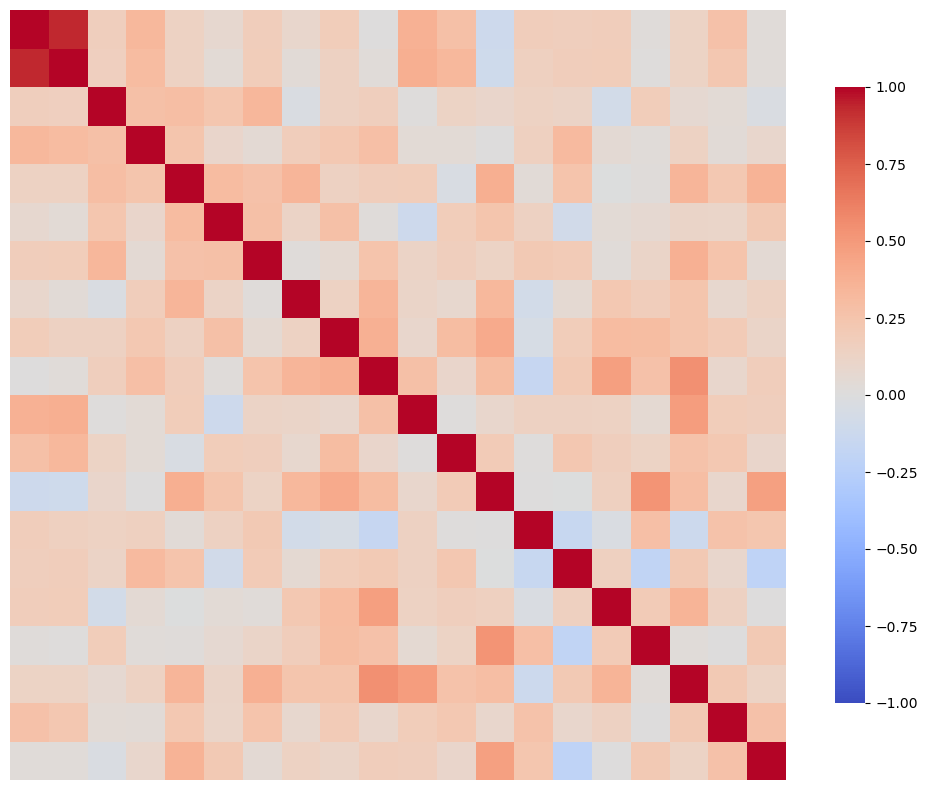

Pairs of features with high correlation among themselves (correlation > 0.8):
                                level_0                              level_1  \
1    linear_UniProtQ9NNX6#CD209OID20262  linear_UniProtQ9H2X3#CLEC4MOID30405   
20  linear_UniProtQ9H2X3#CLEC4MOID30405   linear_UniProtQ9NNX6#CD209OID20262   

           0  
1   0.932627  
20  0.932627  


In [11]:
# Step 1: Calculate Correlations
# Calculate correlation matrix for features
corr_matrix = linear_proteins.corr()

# Calculate correlation between each feature and the response variable
response_correlation = corr_matrix['mtx_binary'].drop('mtx_binary').sort_values(ascending=False)

# Step 2: Filter High Correlations
# Get top 20 features most correlated with the response variable
top_features = response_correlation.head(20).index

# Subset of the DataFrame including only the top correlated features
top_corr_matrix = linear_proteins[top_features].corr()

# Identify pairs of features with high correlation among themselves
# Here we are interested in correlations above 0.8 (for example)
high_corr_pairs = top_corr_matrix.stack().reset_index()
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0].abs() > 0.8]

# Step 3: Visualize Correlations with a Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': .8})
heatmap.set_xticks([])
heatmap.set_yticks([])
plt.title('')
plt.tight_layout()
plt.savefig('top_correlated_features.svg', format='svg')
plt.show()

# Display pairs of features with high correlation among themselves
print("Pairs of features with high correlation among themselves (correlation > 0.8):")
print(high_corr_pairs)

In [ ]:
# Data splitting
y = linear_proteins["mtx_binary"]
X = linear_proteins.drop("mtx_binary", axis=1)
# stratify and do 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

In [199]:
y_train.value_counts()/y_train.shape

mtx_binary
1    0.625
0    0.375
Name: count, dtype: float64

In [201]:
y_test.value_counts()/y_test.shape

mtx_binary
1    0.583333
0    0.416667
Name: count, dtype: float64

In [209]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = np.logspace(2,-2,100)

#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

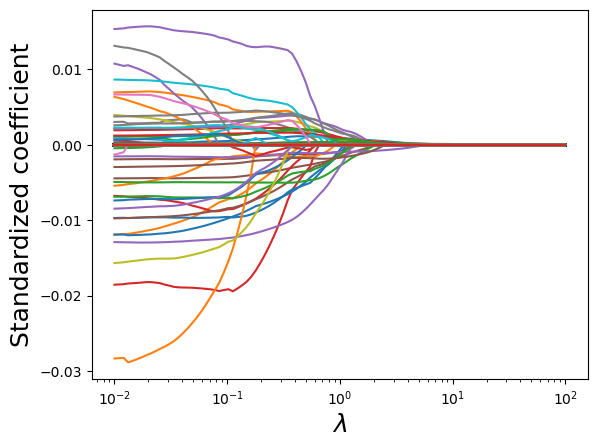

In [213]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')

In [221]:
# a list of possible C values
Cs = np.logspace(-1,1)

# Cs =  the C values we want to try out
# cv = number of folds, 3,5,10 - if no input given, 5-fold
# penalty = Ridge or Lasso
model_cv = LogisticRegressionCV(Cs = Cs, cv=10, penalty='l1', solver='liblinear', random_state=42)

model_cv.fit(X_train, y_train)

model_cv.C_[0]

9.102981779915218

In [235]:
#Using the developed lasso model to predict on test data
model = LogisticRegression(penalty='l1', C = model_cv.C_[0], solver='liblinear')
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:,1]

#Using the predicted probability computed above to find ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print(auc(fpr, tpr))# AUC of ROC

0.6571428571428571


In [237]:
# Identify non-zero coefficients
non_zero_coefs = model_cv.coef_[0] != 0
selected_features = X.columns[non_zero_coefs]

print("Selected features with non-zero coefficients:")
print(selected_features)

# Subset the original DataFrame to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print shape of the subset data
print("Shape of the subset training data:", X_train_selected.shape)
print("Shape of the subset testing data:", X_test_selected.shape)

Selected features with non-zero coefficients:
Index(['linear_UniProtA8MVW0#FAM171A2OID31005',
       'linear_UniProtO00534#VWA5AOID31198',
       'linear_UniProtO43320#FGF16OID30535',
       'linear_UniProtO43422#THAP12OID31238',
       'linear_UniProtO75312#ZPR1OID30801',
       'linear_UniProtO95670#ATP6V1G2OID30167',
       'linear_UniProtO95760#IL33OID20428', 'linear_UniProtP01242#GH2OID21168',
       'linear_UniProtP04090#RLN2OID30601',
       'linear_UniProtP04234#CD3DOID30827',
       'linear_UniProtP04808#RLN1OID30995', 'linear_UniProtP05112#IL4OID20426',
       'linear_UniProtP05113#IL5OID20472', 'linear_UniProtP05187#ALPPOID21383',
       'linear_UniProtP05787#KRT8OID30865',
       'linear_UniProtP10109#FDX1OID30078',
       'linear_UniProtP11310#ACADMOID31277',
       'linear_UniProtP13236#CCL4OID20695',
       'linear_UniProtP14649#MYL6BOID30936',
       'linear_UniProtP20382#PMCHOID30172',
       'linear_UniProtP20809#IL11OID20455',
       'linear_UniProtP21817#RYR1OID3008

In [264]:
# create model first
rf = RandomForestClassifier(random_state = 42)

# create hyperparam grid
params = {'n_estimators': [100, 200, 300, 400, 500], # belongs to forest
          'max_depth': [5, 7, 12, 15, 18], # belongs to each tree
         'max_leaf_nodes': [100, 300, 500, 1000, 1200, 1300], # belongs to each tree
         'max_features': [1, 3, 5, 7, 10] # belongs to forest
          }
rf_grid = GridSearchCV(rf, params, cv=10, n_jobs=-1, verbose=1) # can customize cv with KFold if you want
rf_grid.fit(X_train, y_train)

print("Optimal parameter values =", rf_grid.best_params_)

Fitting 10 folds for each of 750 candidates, totalling 7500 fits
Optimal parameter values = {'max_depth': 5, 'max_features': 3, 'max_leaf_nodes': 100, 'n_estimators': 400}


In [265]:
feat_importances = rf_grid.best_estimator_.feature_importances_
feat_importances_df = pd.DataFrame(feat_importances, X_train.columns).sort_values(0, ascending=False)

In [266]:
feat_importances_df.loc[feat_importances_df[0] != 0]

,0
linear_UniProtQ96FZ7#CHMP6OID30327,0.002770
linear_UniProtQ5T4W7#ARTNOID20446,0.002548
linear_UniProtQ9BYJ0#FGFBP2OID30395,0.002518
linear_UniProtQ9UHD0#IL19OID20158,0.002508
linear_UniProtQ9P0V8#SLAMF8OID21214,0.002490
...,...
linear_UniProtP31948#STIP1OID21077,0.000023
linear_UniProtQ9BYH1#SEZ6LOID21488,0.000021
linear_UniProtQ4VCS5#AMOTOID30572,0.000019
linear_UniProtQ13972#RASGRF1OID31213,0.000017


In [270]:
y_pred_prob = rf_grid.best_estimator_.predict_proba(X_test)[:,1]

#Using the predicted probability computed above to find ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob)
print(auc(fpr, tpr))# AUC of ROC

0.3142857142857143


In [287]:
# create model first
rf = RandomForestClassifier(random_state = 42)

# create hyperparam grid
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
params = {'n_estimators': [10, 20, 30, 50, 75, 100, 150], # belongs to forest
          'max_depth': [5, 7, 12, 15, 18], # belongs to each tree
         'max_leaf_nodes': [10, 25, 50], # belongs to each tree
         'max_features': [3, 5, 7, 10] # belongs to forest
          }
rf_grid = GridSearchCV(rf, params, cv=cv, n_jobs=-1, verbose=1) # can customize cv with KFold if you want
rf_grid.fit(X_train_selected, y_train)

print("Optimal parameter values =", rf_grid.best_params_)
y_pred_prob3 = rf_grid.best_estimator_.predict_proba(X_test_selected)[:,1]

#Using the predicted probability computed above to find ROC-AUC
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_prob3)
print(auc(fpr, tpr))# AUC of ROC

Fitting 10 folds for each of 420 candidates, totalling 4200 fits
Optimal parameter values = {'max_depth': 5, 'max_features': 3, 'max_leaf_nodes': 10, 'n_estimators': 75}
0.8


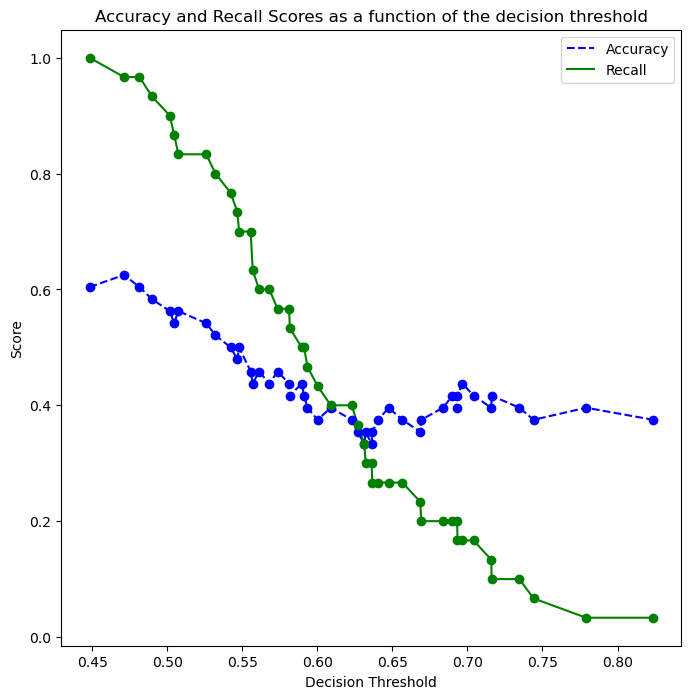

In [278]:
cv = StratifiedKFold(random_state = 42, shuffle=True, n_splits = 5)
# predict on training data for the graph
cross_val_ypred = cross_val_predict(rf_grid.best_estimator_, X_train_selected, y_train, cv = cv, method = 'predict_proba')

# calculate the recall and thresholds, discard precision
p, r, thresholds = precision_recall_curve(y_train, cross_val_ypred[:,1])

# calculate accuracy for each threshold
acc = []
for threshold in thresholds:
    score = accuracy_score(y_train,cross_val_ypred[:,1]>threshold)
    acc.append(score)
# Graph - adapt from helper function in notes to include accuracy
def plot_acc_recall_vs_threshold(accuracies, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Accuracy and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, accuracies, "b--", label="Accuracy")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, accuracies, "o", color = 'blue')
    plt.plot(thresholds, recalls[:-1], "o", color = 'green')
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.legend()
plot_acc_recall_vs_threshold(acc, r, thresholds)

In [280]:
# predict on the test data
y_pred_probas4 =rf_grid.best_estimator_.predict_proba(X_test_selected)[:,1]
y_pred2 = y_pred_probas4 > 0.63
y_pred2 = y_pred2.astype(int)

# check that test data also passes these thresholds
print(accuracy_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.5833333333333334
0.42857142857142855
